# Reading OSM data

In [1]:
from genet import Network
import os
from pprint import pprint

We again initiate an empty `Network` object.

In [2]:
n = Network('epsg:27700')

We use the `read_osm` method pointing at the osm file we want to read and a config defining which OSM tags to read and which modes to assign to the resulting `Network` links. For details on how to set up the config head over to the [wiki page](https://github.com/arup-group/genet/wiki/Usage:-2.2.-Reading-Data:-OSM#setting-up-the-config).

GeNet ingests OSM data with .osm or .osm.pbf extensions, which can be obtained from

- http://download.geofabrik.de/ for well-defined regions/countries
- through JOSM for small subsets and saved to the aforementioned extensions

In [3]:
n.read_osm('../example_data/example.osm', '../configs/slim_config.yml')

2020-12-15 17:30:49,190 - Building OSM graph from file ../example_data/example.osm
2020-12-15 17:30:49,733 - Creating networkx graph from OSM data
2020-12-15 17:30:49,734 - OSM: Extract Nodes and Paths from OSM data
2020-12-15 17:30:49,978 - OSM: Add each OSM way (aka, path) to the OSM graph
2020-12-15 17:30:51,872 - Created OSM edges
2020-12-15 17:30:56,200 - Added 8695 nodes
2020-12-15 17:31:04,488 - Generated 802 link ids.
2020-12-15 17:31:04,869 - Added 802 links
2020-12-15 17:31:04,870 - Deleting isolated nodes which have no edges.
2020-12-15 17:31:05,048 - Removed 8132 nodes.


In [4]:
n.print()

Graph info: Name: Network graph
Type: MultiDiGraph
Number of nodes: 563
Number of edges: 802
Average in degree:   1.4245
Average out degree:   1.4245 
Schedule info: Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0


/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


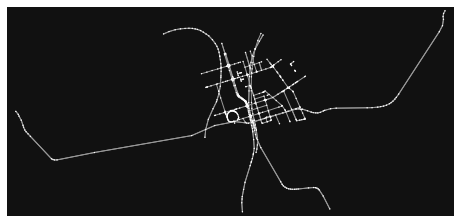

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11444f970>)

In [5]:
n.plot()

In [6]:
n.node_attribute_summary(data=False)

attribute
├── id
├── x
├── y
├── lat
├── lon
└── s2_id


In [7]:
n.link_attribute_summary(data=False)

attribute
├── permlanes
├── freespeed
├── capacity
├── oneway
├── modes
├── from
├── to
├── s2_from
├── s2_to
├── length
├── attributes
│   ├── osm:way:osmid
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:highway
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:lanes
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:psv
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:railway
│   │   ├── name
│   │   ├── class
│   │   └── text
│   ├── osm:way:tunnel
│   │   ├── name
│   │   ├── class
│   │   └── text
│   └── osm:way:access
│       ├── name
│       ├── class
│       └── text
└── id


In [8]:
n.link('1')

{'permlanes': 1.0,
 'freespeed': 12.5,
 'capacity': 600.0,
 'oneway': '1',
 'modes': ['bike', 'walk', 'car'],
 'from': '1685938641',
 'to': '1685938650',
 's2_from': 5221390326939246519,
 's2_to': 5221390326799384759,
 'length': 46.300230884752196,
 'attributes': {'osm:way:osmid': {'name': 'osm:way:osmid',
   'class': 'java.lang.String',
   'text': '235991121'},
  'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'tertiary'}},
 'id': '1'}

#### Remark:
A graph generated from OSM is most likely not **strongly connected** which is something that MATSim expects for the mode `car` and if using `multimodal.contrib` also for modes `walk` and `bike`.